# GRADUATE ADMISSION

![](https://images.prismic.io/etswebsiteprod/580d75dbe5d0ddb934a4fd383b94c634966a2d2f_academy-celebrate-celebration-267885.jpg?auto=compress,format)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')


In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# **Exploratory Data Analysis**

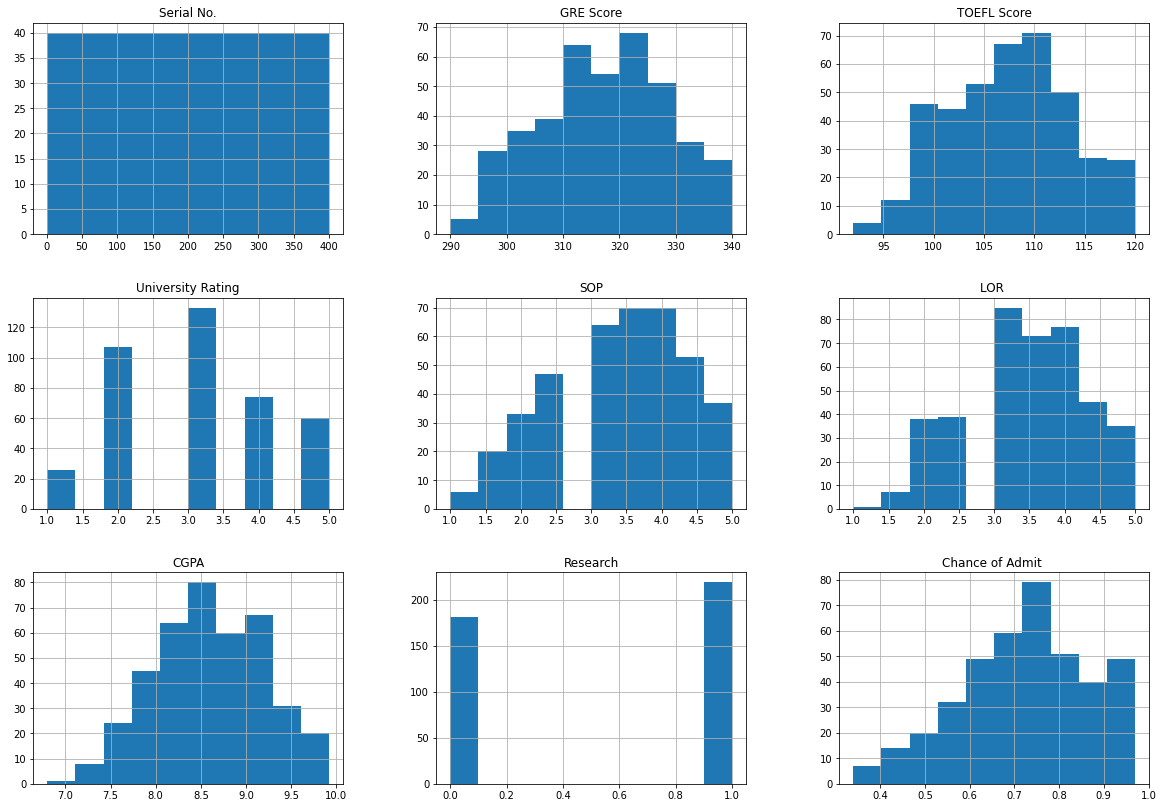

In [5]:
data.hist(figsize=(20,14))
plt.show()


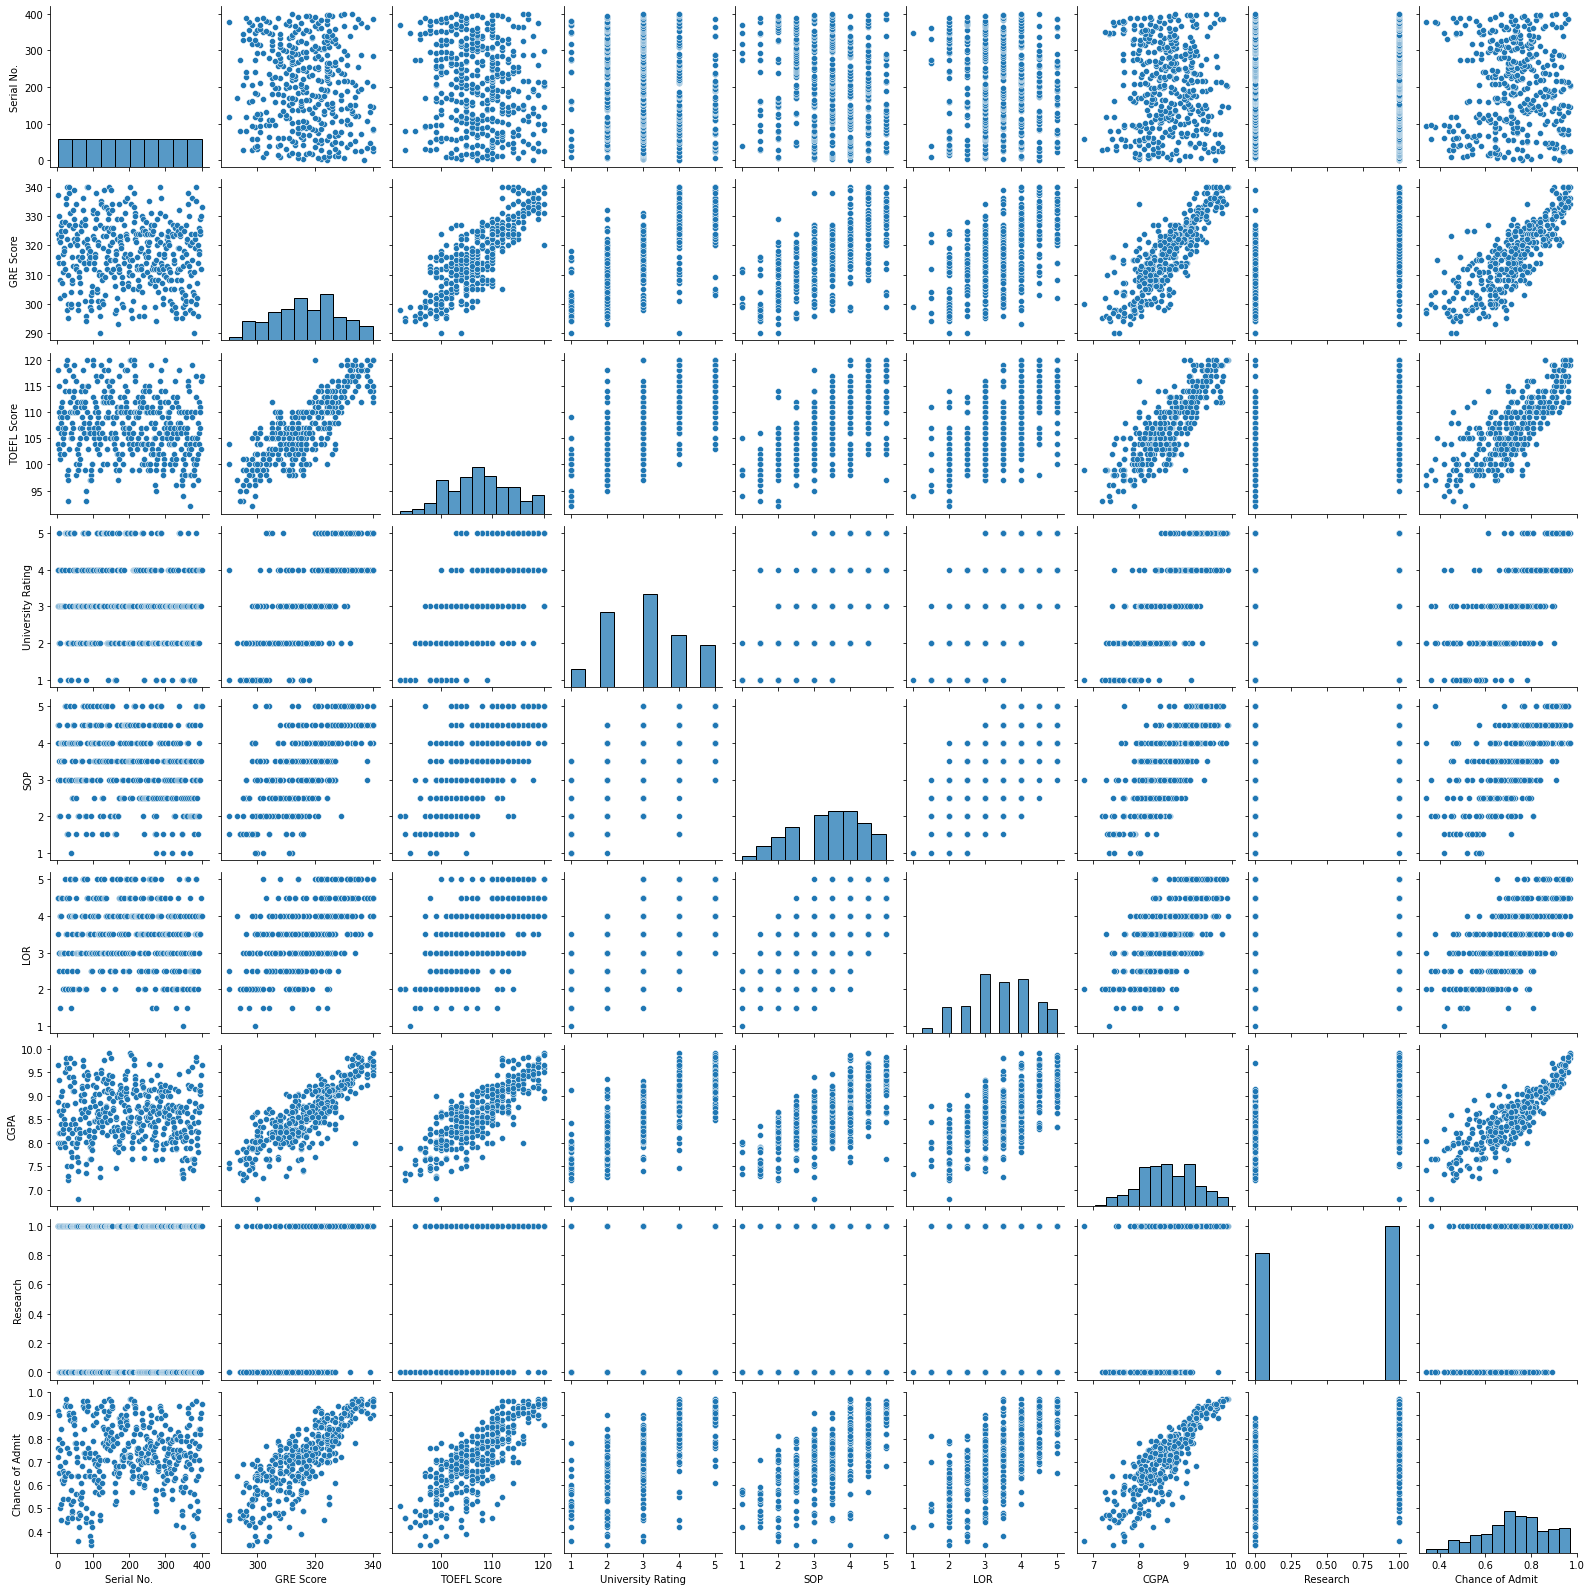

In [6]:
sns.pairplot(data=data)

<AxesSubplot:>

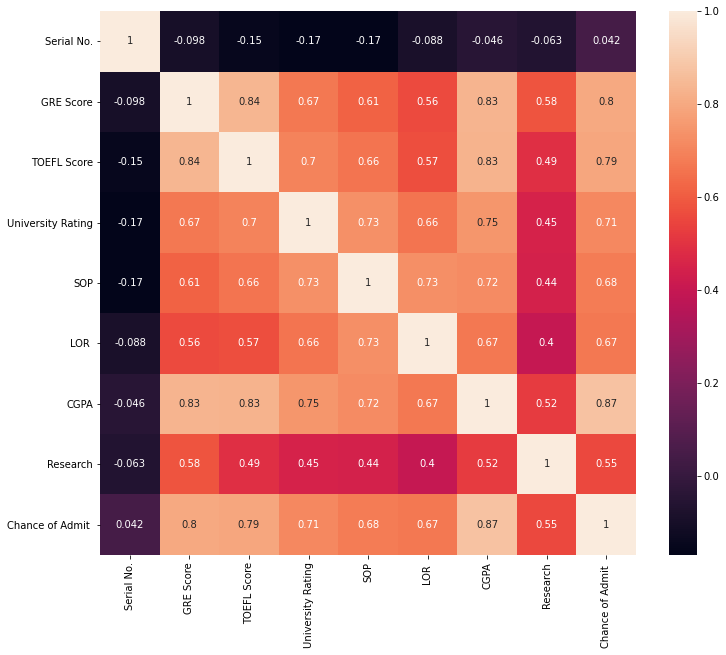

In [7]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

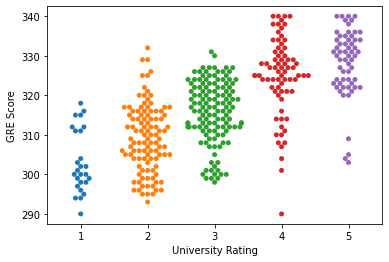

In [8]:
sns.swarmplot(x="University Rating",y="GRE Score",data=data)

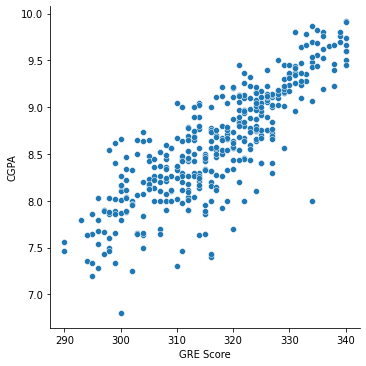

In [9]:
sns.relplot(x="GRE Score",y="CGPA",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

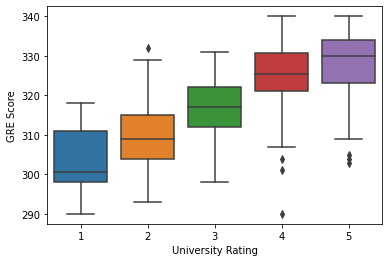

In [10]:
sns.boxplot(x="University Rating",y="GRE Score",data=data)

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

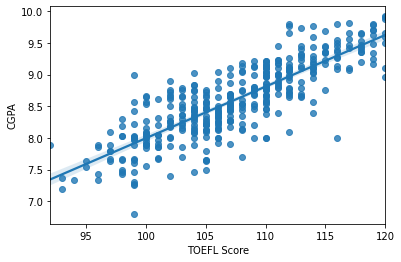

In [11]:
sns.regplot(x="TOEFL Score",y="CGPA",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

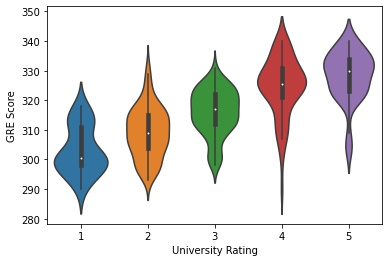

In [12]:
sns.violinplot(x="University Rating",y="GRE Score",data=data)

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

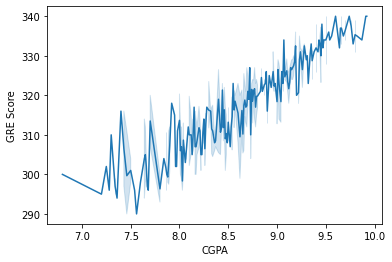

In [13]:
sns.lineplot(x="CGPA",y="GRE Score",data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

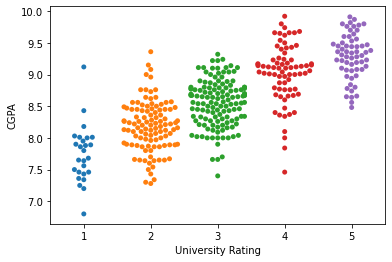

In [14]:
sns.swarmplot(x="University Rating",y="CGPA",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

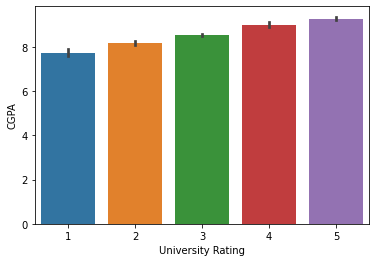

In [15]:
sns.barplot(x="University Rating",y="CGPA",data=data)

<AxesSubplot:xlabel='SOP', ylabel='GRE Score'>

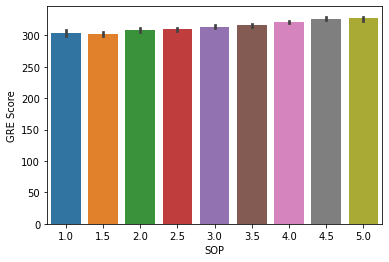

In [16]:
sns.barplot(x="SOP",y="GRE Score",data=data)

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

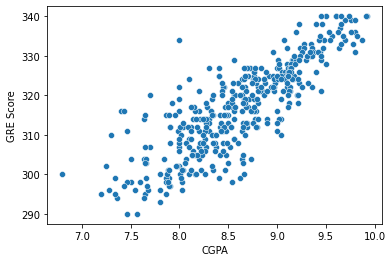

In [17]:
sns.scatterplot(x="CGPA",y="GRE Score",data=data)

In [18]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

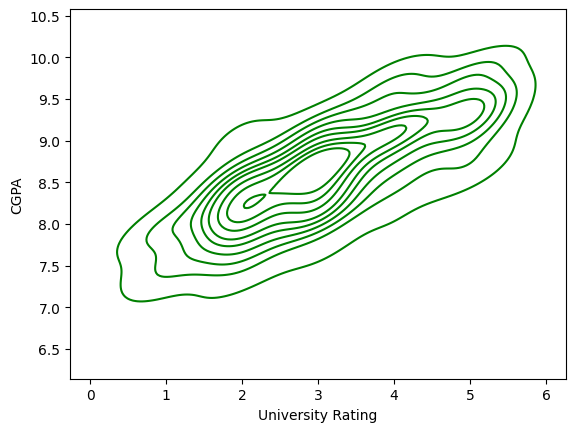

In [19]:
plt.style.use("default")

sns.kdeplot(x="University Rating",y="CGPA",data=data,color='g')


# **LEAST ANGLE REGRESSION**

**In statistics, least-angle regression is an algorithm for fitting linear regression models to high-dimensional data. LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. Lasso model fit with Least Angle Regression a.k.a. Lars.**

In [20]:

from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
x = data.drop('Serial No.',axis=1)
y = data['Serial No.']



# **TRAINING AND TESTING DATA**

In [22]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)
 
# Creating and fitting the regressor
regressor = LassoLars(alpha = 0.1)
regressor.fit(x_train, y_train)

LassoLars(alpha=0.1)

In [23]:
regressor.intercept_

660.27551969968

In [24]:
regressor.coef_

array([ -1.03151733,  -4.40920908, -29.02405365,  -6.20975218,
       -14.32036558,  25.3172557 ,   0.        , 388.03539059])

In [25]:
y_pred = regressor.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.08855248254102943


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)



12508.910742003374

In [27]:
mean_absolute_error(y_test,y_pred)

94.79648309893122

In [28]:
regressor.score(x_test,y_test)

0.08855248254102943

# **Thank You**